# Projeto WeRateDogs

Por Marcos Vinicius Gracioli Malta de Oliveira

Data: Agosto de 2018

In [1]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import requests
import re
import os

## Juntando informação

In [2]:
# Uso de requests para baixar o arquivo tsv do website
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [3]:
# Ler o arquivo tsv em um Pandas DataFrame   
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t') 

In [4]:
# Ver os 5 primeiros registros de image_predictions no DataFrame
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Consulta a API do Twitter para os dados JSON de cada tweet usando a biblioteca Tweepy do Python e armazenar todos os conjuntos de dados JSON de cada tweet em um arquivo.

In [2]:
# Código disponibilizado pelos colaboradores da udacity em virtude da demora do twitter em liberar meu usuário de desenvolvedor
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# Instructions for registering Twitter app and generating access tokens:
# https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

# Read in csv file as a Pandas DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

tweet_ids = twitter_archive.tweet_id.values

len(tweet_ids)

tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

In [6]:
# ler o JSON em disco
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

## Avaliação de dados

Depois de coletar cada um dos dados acima, avalie-os visualmente e programaticamente em busca de problemas de qualidade e limpeza. 
Detecte e documente pelo menos oito (8) problemas de qualidade e dois (2) problemas de limpeza no seu notebook wrangle_act.ipynb Jupyter. 

In [7]:
# Criar o tweet_info no DataFrame
tweet_info = pd.DataFrame(tweets_data)

In [8]:
# Adicionar as variaveis em tweet_info no DataFrame
#tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
#tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
#tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [9]:
# ver os 5 primeiros registros de twitter_archive no DataFrame
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# ver os 5 ultimos registros de twitter_archive no DataFrame
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
# Ver informações de twitter_archive no DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Ver estatisticas de twitter_archive no DataFrame
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Ordenar os dados da coluna 'name' em ordem alfabetica
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [14]:
# Ver o numero de entradas da coluna 'source'
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# Ver os ultimos 5 registros de image_predictions em DataFrame
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
# Ver info de image_predictions em DataFrame
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Ver estatisticas de image_predictions no DataFrame
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
# ver os 5 primeiros registros de tweet_info DataFrame
tweet_info.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
# ver informações de tweet_info no DataFrame
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [20]:
# ver estatisticas de tweet_info em DataFrame
tweet_info.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


#### Problemas de Qualidade

##### tabelas

##### twitter_archive:
- Tweets sem images (registros da coluna 'expanded_urls' nulos)
- Necesssário remover linhas que foram retweetadas(registros que possuem retweeted_status_id), porque elas não são tweets originais
- Tipos de dados errados (coluna timestamp deve ser datetime)
- Os nomes dos cães estão errados, rotulados ou faltando.
- Registros de 'source' pouco usual
- Excluír colunas do conjunto de dados que não são necessárias para a análise   

#### `Image Predictions`:
- Coluna p1: Colocar a primeira letra do nome maiscula
- Coluna p2: Colocar a primeira letra do nome maiscula
- Coluna p2: Colocar a primeira letra do nome maiscula
- Remover o (_) entre as palavras das colunar p1, p2, p3

#### `tweet_info`:
- Renomear a coluna `id` para "tweet_id" 
- Excluir os registros com retweeted_status nulos
- O campo relevante é retweet_count. Este campo fornece o número de vezes que este tweet foi retweetado. Observar que esse número pode variar com o tempo, pois outras pessoas retweetam o tweet.



#### Problemas de Arrumação

##### tabelas

#### `twitter_archive` :

- Analisar as informações datetime em colunas separadas
- Eliminar colunas que não são necessárias e reorganizar a ordem das colunas para facilitar a leitura
- Combinar cada coluna do estágio do cão em uma única coluna chamada "Stage"
- Colunas criadas de `timestamp` devem ser convertidas em objeto datetime
- Coluna `source` deve ser formatada adequadamente e convertida em objeto category
- Colunas de `Rating` devem ser convertidas em valor float
- Coluna `text` com caracteres estranhos


#### `Tweet_info` :
- Converter a `id` para `tweet_id' 
- Eliminar colunas desnecessárias
- Consolidar a tabela com as colunas: tweet_id, retweet count e favorite count

#### `Todas tabelas`: 
- Juntar 'tweet_info' e 'image_predictions' a tabela 'twitter_archive'
- Reindexar a deverivada

## Limpeza de dados

In [21]:
# copiar os dataframes 
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

#### Definição 

Converter a coluna 'timestamp' de uma string para objetos DateTime

#### Código

In [22]:
from datetime import datetime,timedelta

#verificar o tipo de dados da coluna timestamp
type(twitter_archive_clean['timestamp'].iloc[0])

str

In [23]:
#Usar pd.to_datetime para converter em datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#Criar duas novas coluna: uma date e outra time
twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_archive_clean['time'] = twitter_archive_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [24]:
# Colunas Date e Time devem ter os tipos adequados
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'])
twitter_archive_clean['time'] = pd.to_datetime(twitter_archive_clean['time'])

#### Teste

In [25]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,2018-08-22 16:23:00


In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                    

#### Definição 

Combinar os estágios dos cães na nova coluna "Stages"

#### Código

In [27]:
twitter_archive_clean['stage'] = twitter_archive[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

twitter_archive_clean['stage'].replace("NoneNoneNoneNone","None", inplace=True)
twitter_archive_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_archive_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_archive_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_archive_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
twitter_archive_clean['stage'].replace("doggoNoneNonepuppo","doggo", inplace=True)
twitter_archive_clean['stage'].replace("doggoflooferNoneNone","doggo", inplace=True)
twitter_archive_clean['stage'].replace("doggoNonepupperNone","doggo", inplace=True)

In [28]:
# Converter a palavra "None" para nulo
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('None', np.NaN)

#### Teste

In [29]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,2018-08-22 16:23:00,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,2018-08-22 00:17:00,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,2018-08-22 00:18:00,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,2018-08-22 15:58:00,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,2018-08-22 16:00:00,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2017-07-29,2018-08-22 00:08:00,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2017-07-28,2018-08-22 16:27:00,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,2017-07-28,2018-08-22 00:22:00,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,2017-07-27,2018-08-22 16:25:00,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,2017-07-26,2018-08-22 15:59:00,doggo


##### Definição

Remover registros sem imagens (expanded_urls). 

##### Código

In [30]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

##### Teste

In [31]:
sum(twitter_archive_clean['expanded_urls'].isnull())

0

##### Definição

Remover retweets.

##### Definição

In [32]:
# Selecionar registros onde a coluna 'retweeted_status_id' seja nula e sobrescrever twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

##### Teste

In [33]:
sum(twitter_archive_clean['retweeted_status_id'].isnull())

2117

##### Definição

Mudar nome incorreto dos cães.

##### Código

In [34]:
# Dados perdidos
# Sobrescrever com nomes corretos
twitter_archive_clean['name'].replace('the', 'None', inplace=True)
twitter_archive_clean['name'].replace("light",'None', inplace=True)
twitter_archive_clean['name'].replace("life",'None', inplace=True)
twitter_archive_clean['name'].replace("an",'None', inplace=True)
twitter_archive_clean['name'].replace("a",'None', inplace=True)
twitter_archive_clean['name'].replace("by",'None', inplace=True)
twitter_archive_clean['name'].replace("actually",'None', inplace=True)
twitter_archive_clean['name'].replace("just",'None', inplace=True)
twitter_archive_clean['name'].replace("getting",'None', inplace=True) 
twitter_archive_clean['name'].replace("infuriating",'None', inplace=True) 
twitter_archive_clean['name'].replace("old",'None', inplace=True) 
twitter_archive_clean['name'].replace("all",'None', inplace=True) 
twitter_archive_clean['name'].replace("this",'None', inplace=True) 
twitter_archive_clean['name'].replace("very",'None', inplace=True) 
twitter_archive_clean['name'].replace("mad",'None', inplace=True) 
twitter_archive_clean['name'].replace("not",'None', inplace=True)
twitter_archive_clean['name'].replace("one",'None', inplace=True)
twitter_archive_clean['name'].replace("my",'None', inplace=True)
twitter_archive_clean['name'].replace("O","O'Malley", inplace=True)
twitter_archive_clean['name'].replace("quite","None", inplace=True)
twitter_archive_clean['name'].replace("such","None", inplace=True)

In [35]:
# Coluna text que contém a palabra 'name is'
named_to_replace = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('named'))]
name_is_to_replace = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('name is'))]
not_named_to_replace = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower())]

# Salvo os encontrados em uma lista
named_to_replace_list = named_to_replace['text'].tolist()
name_is_to_replace_list = name_is_to_replace['text'].tolist()
not_named_to_replace_list = not_named_to_replace['text'].tolist()

# Percorrer a lista onde o nome é minúsculo e as palavras 'named' aparecem em 'text' e definem o 'name' 
# o valor é a palavra que aparece depois de "named"
for entry in named_to_replace_list:
    mask = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# Percorrer a lista onde o nome é minúsculo e as palavras 'named' aparecem em 'text' e definem o 'name'
# o valor é a palavra que aparece depois de "name is"   
for entry in name_is_to_replace_list:
    mask = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# Percorrer a lista onde o nome é minúsculo e substituir
for entry in not_named_to_replace_list:
    mask = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[mask, name_column] = "None"

##### Teste

In [36]:
twitter_archive_clean.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
1954          Albert
875           Albert
412            Albus
144            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
367            Alfie
1616           Alfie
858            Alfie
2238           Alfie
51              Alfy
1701           Alice
201            Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
563           Winnie
407          Winston
559          Winston
1829         Winston
2133         Winston
816          Winston
280          Winston
1243         Winston
986          Winston
877           Wishes
410            Wyatt
1451           Wyatt
174            Wyatt
1378            Yoda
622             Yogi
43              Yogi
1409         

In [37]:
# verifico se existe nomes em minúsculo
twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,stage


##### Definição

Alterar os valores nulos da coluna 'name' de 'None' para NaN

##### Código

In [38]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.NaN)

#### Teste

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1391 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
date                          

##### Definição

Remove Colunas não usadas

##### Código

In [40]:
twitter_archive_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'doggo',
               'floofer',
               'pupper',
               'puppo'], axis=1,inplace=True)

#### Teste

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null int64
source                2117 non-null object
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1391 non-null object
date                  2117 non-null datetime64[ns]
time                  2117 non-null datetime64[ns]
stage                 338 non-null object
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 165.4+ KB


##### Definição

Remover caracteres extras depois de '&' na coluna ['text'].

##### Código

In [42]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')

##### Teste

In [43]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')]

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,stage


##### Definição

Mudar registros da coluna 'source' para categorias mais legíveis.

##### Código

In [44]:
# Removo urls de source
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [45]:
# Mudar o tipo de dados para category. 
# Conforme a documentação do pandas "A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). 
# "Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales."
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

##### Teste

In [46]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1985
Vine                    91
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null int64
source                2117 non-null category
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1391 non-null object
date                  2117 non-null datetime64[ns]
time                  2117 non-null datetime64[ns]
stage                 338 non-null object
dtypes: category(1), datetime64[ns](2), int64(3), object(3)
memory usage: 151.1+ KB


##### Definição

Altero o tipo de dados de "rating_numerator" e "denominator" para float

##### Código

In [48]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')

##### Teste

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null int64
source                2117 non-null category
text                  2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  1391 non-null object
date                  2117 non-null datetime64[ns]
time                  2117 non-null datetime64[ns]
stage                 338 non-null object
dtypes: category(1), datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 151.1+ KB


#### Define

Removo o sublinhado nas colunas p1, p2, p3

#### Código

In [50]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

#### Teste

In [51]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Definição

Faço o texto consistente nas colunas p1, p2 e p3

#### Código

In [52]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

#### Teste

In [53]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Renomeio a coluna "id" para "tweet_id" para corresponder aos outros 2 conjuntos de dados

#### Código

In [54]:
tweet_info_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [55]:
tweet_info_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Teste

In [56]:
tweet_info_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [57]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
tweet_id                         2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

#### Definição

Identificar e excluir tweets que tenham um retweeted_status porque o tweet é um retweet e, portanto, não é original.

#### Código

In [58]:
tweet_info_clean[tweet_info_clean['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
31,None,None,Sat Jul 15 02:45:48 +0000 2017,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None,...,False,NaN,8.860534e+17,886053434075471873,108,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,None,None,Thu Jul 13 01:35:06 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,None,...,False,NaN,NaN,NaN,19297,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,None,None,Mon Jun 26 00:13:58 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,None,...,NaN,NaN,NaN,NaN,7181,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,None,None,Sat Jun 24 00:09:53 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,None,...,NaN,NaN,NaN,NaN,1349,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,None,None,Fri Jun 23 18:17:33 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,None,...,NaN,NaN,NaN,NaN,6965,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,None,None,Wed Jun 21 19:36:23 +0000 2017,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,None,...,False,NaN,NaN,NaN,83,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,None,None,Tue Jun 13 01:14:41 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,None,...,NaN,NaN,NaN,NaN,15546,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
94,None,None,Sun Jun 11 00:25:14 +0000 2017,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 868880391209275392, 'id_str'...",0,False,RT @dog_rates: This is Walter. He won't start ...,None,...,False,NaN,NaN,NaN,12518,False,{'created_at': 'Sun May 28 17:23:24 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
96,None,None,Sat Jun 10 00:35:19 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Sierra. She's one preci...,None,...,NaN,NaN,NaN,NaN,1667,False,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
100,None,None,Thu Jun 08 04:17:07 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @loganamnosis: Penelope here is doing me qu...,None,...,NaN,NaN,NaN,NaN,31,False,{'created_at': 'Thu Jun 08 03:32:35 +0000 2017.

In [59]:
#remover 
tweet_info_clean.drop(tweet_info_clean[tweet_info_clean['retweeted_status'].notnull()== True].index,inplace=True)

#### Teste

In [60]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2175 non-null object
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null bool
full_text                        2175 non-null object
geo                              0 non-null object
tweet_id                         2175 non-null int64
id_str                           2175 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

#### Definição

remover colunas indesejadas do dataframe

#### Código

In [61]:
tweet_info_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'truncated',
                     'full_text',
                     'source',
                     'user',
                     'display_text_range'], axis=1,inplace=True)

#### Teste

In [62]:
tweet_info_clean.head(10)

,favorite_count,tweet_id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


#### Definição

Uso inner para combinar os conjuntos de dados em um único dataframe

#### Código

In [63]:
df_merge = pd.merge(twitter_archive_clean, tweet_info_clean,on='tweet_id', how='inner')

In [64]:
df_merge = pd.merge(df_merge, image_predictions_clean,on='tweet_id', how='inner')

#### Teste

In [65]:
df_merge

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017-08-01,2018-08-22 16:23:00,NaN,39467,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017-08-01,2018-08-22 00:17:00,NaN,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017-07-31,2018-08-22 00:18:00,NaN,25461,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017-07-30,2018-08-22 15:58:00,NaN,42908,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017-07-29,2018-08-22 16:00:00,NaN,41048,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,NaN,2017-07-29,2018-08-22 00:08:00,NaN,20562,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,2017-07-28,2018-08-22 16:27:00,NaN,12041,...,1,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,NaN,2017-07-28,2018-08-22 00:22:00,NaN,56848,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,2017-07-27,2018-08-22 16:25:00,NaN,28226,...,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,2017-07-26,2018-08-22 15:59:00,doggo,32467,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [66]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
source                1994 non-null category
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1350 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null datetime64[ns]
stage                 306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf             

#### Definição

- Altero a ordem (o índice) das colunas df_merge

#### Código

In [67]:
columnTitles = ['tweet_id',
                'date',
                'time',
                'name',
                'stage',
                'source',
                'rating_numerator',
                'rating_denominator',
                'favorite_count',
                'retweet_count',
                'text',
                'jpg_url',
                'img_num',
                'p1',
                'p1_conf',
                'p1_dog',
                'p2',
                'p2_conf',
                'p2_dog',
                'p3',
                'p3_conf',
                'p3_dog']
df_merge = df_merge.reindex(columns=columnTitles)

#### Teste

In [68]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
date                  1994 non-null datetime64[ns]
time                  1994 non-null datetime64[ns]
name                  1350 non-null object
stage                 306 non-null object
source                1994 non-null category
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
text                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf             

## Armazenando, analisando e visualizando os dados 

Armazene o(s) dataframe(s) limpo(s) em um arquivo CSV, com o principal deles intitulado twitter_archive_master.csv. Se adicionais existirem, os nomeie de forma apropriada. Além disso, você pode armazenar os dados limpos em um banco de dados SQLite (que também deve ser enviado, caso você o faça).

Analise e visualize seus dados wrangled em seu notebook Jupyter. Pelo menos três (3) insights e uma (1) visualização devem ser produzidos.

### Armazenar os dataframes limpos

In [69]:
# Salvar para csv (index == false) retira a coluna sequencial do dataframe
folder_name = 'Data_Final'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Salvar os dataframes dos dados originais que foram limpos
twitter_archive_clean.to_csv(folder_name+'/twitter_archive_clean.csv', index=False)
image_predictions_clean.to_csv(folder_name+'/image_predictions_clean.csv', index=False)
tweet_info_clean.to_csv(folder_name+'/tweet_info_clean.csv', index=False)

# Salvar o dataframe principal
df_merge.to_csv(folder_name+'/twitter_archive_master.csv', index=False)

# Salvar para sqllite
from sqlalchemy import create_engine
import datetime as dt

arquivo = 'weratedogs.db'

if os.path.isfile(folder_name+'/'+arquivo):
    os.remove(folder_name+'/'+arquivo)

# Cria o SQLAlchemy Engine e esvazia o banco de dados sqlite weratedogs
engine = create_engine('sqlite:///'+folder_name+'/'+arquivo)

# Insere os dados de forma interativa no banco de dados sqlite weratedogs
# Evita o erro 'too many parameters'
start = dt.datetime.now()
chunksize = 6
j = 0
index_start = 1

for df in pd.read_csv(folder_name+'/twitter_archive_master.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):

    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df.index += index_start
    j+=1
    print('{} segundos: concluído {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize))

    df.to_sql('twitter_archive_master', engine, index=False, if_exists='append')
    index_start = df.index[-1] + 1

0 segundos: concluído 6 rows
0 segundos: concluído 12 rows
0 segundos: concluído 18 rows
1 segundos: concluído 24 rows
1 segundos: concluído 30 rows
1 segundos: concluído 36 rows
1 segundos: concluído 42 rows
1 segundos: concluído 48 rows
2 segundos: concluído 54 rows
2 segundos: concluído 60 rows
2 segundos: concluído 66 rows
2 segundos: concluído 72 rows
2 segundos: concluído 78 rows
3 segundos: concluído 84 rows
3 segundos: concluído 90 rows
3 segundos: concluído 96 rows
3 segundos: concluído 102 rows
3 segundos: concluído 108 rows
4 segundos: concluído 114 rows
4 segundos: concluído 120 rows
4 segundos: concluído 126 rows
4 segundos: concluído 132 rows
5 segundos: concluído 138 rows
5 segundos: concluído 144 rows
5 segundos: concluído 150 rows
5 segundos: concluído 156 rows
5 segundos: concluído 162 rows
5 segundos: concluído 168 rows
6 segundos: concluído 174 rows
6 segundos: concluído 180 rows
6 segundos: concluído 186 rows
6 segundos: concluído 192 rows
6 segundos: concluído 198

59 segundos: concluído 1548 rows
59 segundos: concluído 1554 rows
60 segundos: concluído 1560 rows
60 segundos: concluído 1566 rows
60 segundos: concluído 1572 rows
60 segundos: concluído 1578 rows
60 segundos: concluído 1584 rows
61 segundos: concluído 1590 rows
61 segundos: concluído 1596 rows
61 segundos: concluído 1602 rows
61 segundos: concluído 1608 rows
61 segundos: concluído 1614 rows
62 segundos: concluído 1620 rows
62 segundos: concluído 1626 rows
62 segundos: concluído 1632 rows
62 segundos: concluído 1638 rows
62 segundos: concluído 1644 rows
63 segundos: concluído 1650 rows
63 segundos: concluído 1656 rows
63 segundos: concluído 1662 rows
63 segundos: concluído 1668 rows
63 segundos: concluído 1674 rows
63 segundos: concluído 1680 rows
64 segundos: concluído 1686 rows
64 segundos: concluído 1692 rows
64 segundos: concluído 1698 rows
65 segundos: concluído 1704 rows
65 segundos: concluído 1710 rows
65 segundos: concluído 1716 rows
65 segundos: concluído 1722 rows
65 segundo

## Analizar

#### Definição

- Qual é o nome do cachorro favorito e a foto dele?
- O cachorro favorito também tem mais retweets?
- Quais são os 5 principais nomes de cachorro mais populares?
- Quais foram os dispositivos utilizados nos twittes?

In [70]:
# Qual é o nome do cachorro favorito e a foto dele?
df = pd.read_sql_query('WITH tabela1 AS (SELECT tweet_id, MAX(favorite_count) ' 
                       'FROM twitter_archive_master '
                       'WHERE name IS NOT NULL ' 
                       'GROUP BY tweet_id '
                       'ORDER BY MAX(favorite_count) DESC '
                       'LIMIT 1) '
                       'SELECT master.tweet_id, master.name, master.jpg_url '  
                       'FROM twitter_archive_master master ' 
                       'INNER JOIN tabela1 on tabela1.tweet_id = master.tweet_id', engine)

In [71]:
# Setar a colunas texto com o maximo de espaço para exibir todo conteudo
pd.set_option('display.max_colwidth', -1)

df

,tweet_id,name,jpg_url
0,879415818425184262,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg


In [72]:
df.jpg_url

0    https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg
Name: jpg_url, dtype: object

#### Resultado

O nome do cão com mais favoritos é Duddles e a url da foto é mostrada no dataframe

In [73]:
# O cachorro favorito também tem mais retweets?
df2 = pd.read_sql_query('WITH tabela1 AS (SELECT tweet_id, MAX(favorite_count) ' 
                       'FROM twitter_archive_master ' 
                       'WHERE name IS NOT NULL ' 
                       'GROUP BY tweet_id '
                       'ORDER BY MAX(favorite_count) DESC '
                       'LIMIT 1), '
                       'tabela2 AS (SELECT tweet_id, MAX(retweet_count) '  
                       'FROM twitter_archive_master '
                       'WHERE name IS NOT NULL ' 
                       'GROUP BY tweet_id '
                       'ORDER BY MAX(retweet_count) DESC '
                       'LIMIT 1) '
                       'SELECT master.tweet_id, master.name, "favorito" as "Status" ' 
                       'FROM twitter_archive_master master '
                       'INNER JOIN tabela1 on tabela1.tweet_id = master.tweet_id '
                       'UNION '
                       'SELECT master.tweet_id, master.name, "mais retweets" as "Status" '  
                       'FROM twitter_archive_master master ' 
                       'INNER JOIN tabela2 on tabela2.tweet_id = master.tweet_id', engine)

In [74]:
df2

,tweet_id,name,Status
0,807106840509214720,Stephan,mais retweets
1,879415818425184262,Duddles,favorito


#### Resultado

O cão com mais favoritos não é o mesmo com mais retweets

In [75]:
# Quais são os 5 principais nomes de cachorro mais populares?
df3 = pd.read_sql_query('SELECT master.name, count(master.tweet_id) as qtde ' 
                        'FROM twitter_archive_master master '
                        'WHERE master.name is not null '
                        'GROUP BY master.name '
                        'ORDER BY qtde desc '
                        'LIMIT 5', engine)

df3

,name,qtde
0,Charlie,11
1,Cooper,10
2,Lucy,10
3,Oliver,10
4,Penny,9


### Resultado

O nome do cão mais polular é Charlie. Os outros quatro são exibidos no dataframe.

In [76]:
# Quais foram os dispositivos utilizados nos twittes?
df4 = pd.read_sql_query('SELECT DISTINCT master.source ' 
                        'FROM twitter_archive_master master ', engine)

df4

,source
0,Twitter for iPhone
1,Twitter Web Client
2,TweetDeck


### Resultado

Os meios utilizados para twitar são exibidos no dataframe. Vale lembrar que existia o registro vine.

### Visualização

- Quantidade de ocorrência da classificação dos cães.

In [77]:
import matplotlib.pyplot as plt
import random

colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

In [78]:
# Qual é a classificação mais comum dos cães?
df5 = pd.read_sql_query('SELECT master.stage, count(*) as qtde ' 
                        'FROM twitter_archive_master master '
                        'WHERE master.stage is not null '
                        'GROUP BY master.stage '
                        'ORDER BY qtde desc ', engine)


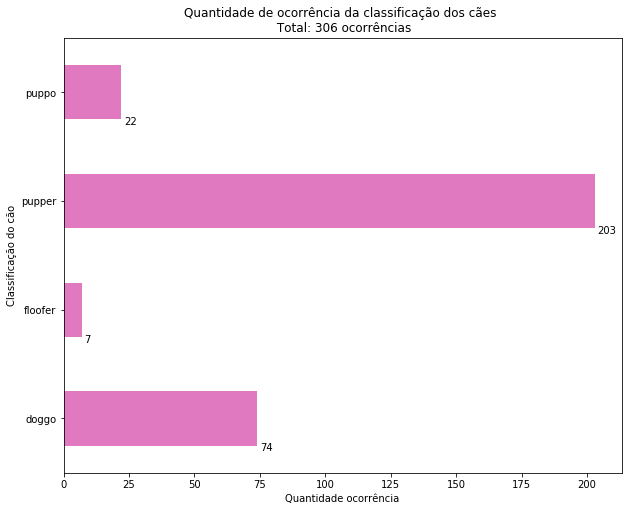

In [79]:
#quantidade de cada classificação dos cães
classificacao = df5.groupby('stage')['qtde'].sum().plot(kind='barh', figsize=(10,8), color=random.choice(colors))

# coloca a quantidade nas barras
for c in classificacao.patches:
    b=c.get_bbox()
    classificacao.annotate("{:.0f}".format(b.x1 + b.x0), (c.get_x() + c.get_width() + 1, c.get_y() - 0.05))
    
plt.title('Quantidade de ocorrência da classificação dos cães \n Total: '+ str(df5['qtde'].sum())+ ' ocorrências')
plt.xlabel('Quantidade ocorrência')
plt.ylabel('Classificação do cão')
plt.show()